In [9]:
import os
import pandas as pd
import numpy as np
import plotnine as p9

In [2]:
# list output files
file_paths = os.listdir(os.path.join('data', 'results'))
# keep only .csv files
results = [pd.read_csv(os.path.join('data', 'results', p)) for p in file_paths if p.endswith('.csv')]

In [3]:
results = pd.concat(results)

In [4]:
results['mean_auc'] = results.groupby(['reduction_name', 'dataset', 'score_key'])['auc'].transform('mean')

In [5]:
results

,reduction_name,score_key,fold,auc,tpr,fpr,train_split,test_split,dataset,mean_auc
0,mofa,lr_means,0,0.600000,[0. 0.2 0.4 0.4 1. 1. ],[0. 0. 0. 0.66666667 0...,[ 0 1 3 6 8 9 10 12 14 15 16 17 20 21],[ 2 4 5 7 11 13 18 19],carraro,0.600000
1,tensor,lr_means,0,0.266667,[0. 0. 0.2 0.2 0.6 0.6 1. ],[0. 0.33333333 0.33333333 0.66666667 0...,[ 0 1 3 6 8 9 10 12 14 15 16 17 20 21],[ 2 4 5 7 11 13 18 19],carraro,0.366667
2,mofa,lr_means,1,0.500000,[0. 0. 0.5 0.5 1. 1. ],[0. 0.33333333 0.33333333 0.66666667 0...,[ 0 1 2 3 4 5 6 7 8 9 11 12 13 18 19],[10 14 15 16 17 20 21],carraro,0.600000
3,tensor,lr_means,1,0.500000,[0. 0. 1. 1.],[0. 0.5 0.5 1. ],[ 0 1 2 3 4 5 6 7 8 9 11 12 13 18 19],[10 14 15 16 17 20 21],carraro,0.366667
4,mofa,lr_means,2,0.700000,[0. 0.2 0.4 0.4 1. 1. ],[0. 0. 0. 0.5 0.5 1. ],[ 2 4 5 7 10 11 13 14 15 16 17 18 19 20 21],[ 0 1 3 6 8 9 12],carraro,0.600000
...,...,...,...,...,...,...,...,...,...,...
37,tensor,magnitude_rank,0,0.604167,[0. 0. 0.16666667 0.16666667 0...,[0. 0.125 0.125 0.25 0.25 0.375 0.375 0.5...,[ 1 2 3 4 5 6 7 8 10 11 13 15 18 19 21 ...,[ 0 9 12 14 16 17 20 28 30 32 33 36 38 39],velmeshev,0.518849
38,mofa,magnitude_rank,1,0.738095,[0. 0.16666667 0.5 0.5 0...,[0. 0. 0. 0.28571429 0...,[ 0 4 5 7 8 9 11 12 13 14 16 17 18 19 20 ...,[ 1 2 3 6 10 15 22 23 24 25 27 29 35],velmeshev,0.810516
39,tensor,magnitude_rank,1,0.404762,[0. 0. 0.33333333 0.33333333 0...,[0. 0.14285714 0.14285714 0.71428571 0...,[ 0 4 5 7 8 9 11 12 13 14 16 17 18 19 20 ...,[ 1 2 3 6 10 15 22 23 24 25 27 29 35],velmeshev,0.518849
40,mofa,magnitude_rank,2,0.714286,[0. 0.16666667 0.5 0.5 0...,[0. 0. 0. 0.14285714 0...,[ 0 1 2 3 6 9 10 12 14 15 16 17 20 22 23 ...,[ 4 5 7 8 11 13 18 19 21 26 31 34 37],velmeshev,0.810516


In [18]:
results['score_key'].unique()

remap_dict = {'lr_means':'CellPhoneDB',
              'expr_prod':'NATMI',
              'lr_logfc': 'logFC',
              'lrscore': 'SingleCellSignalR',
              'lr_probs': 'CellChat',
              'magnitude_rank':'Consensus'}
results['score_key'] = results['score_key'].map(remap_dict)

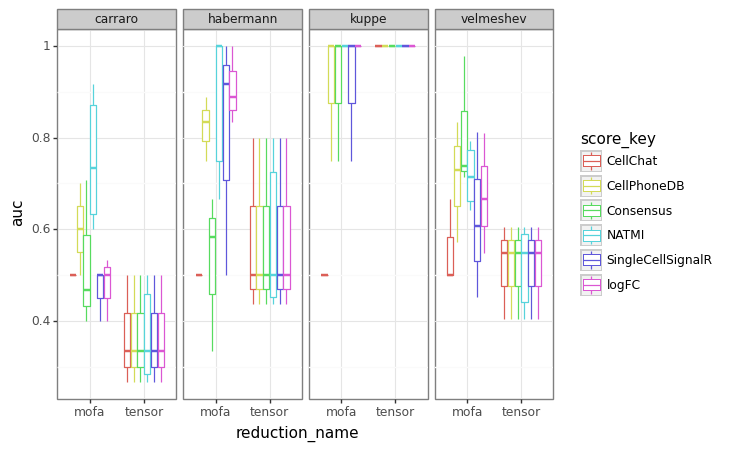

<ggplot: (8794588172763)>

In [20]:
## plot results as boxplots by reduction_name & score_key
p9.ggplot(results, p9.aes(x='reduction_name', y='auc', color='score_key')) + \
    p9.geom_boxplot() + \
    p9.theme_bw() + p9.facet_grid(' ~ dataset')

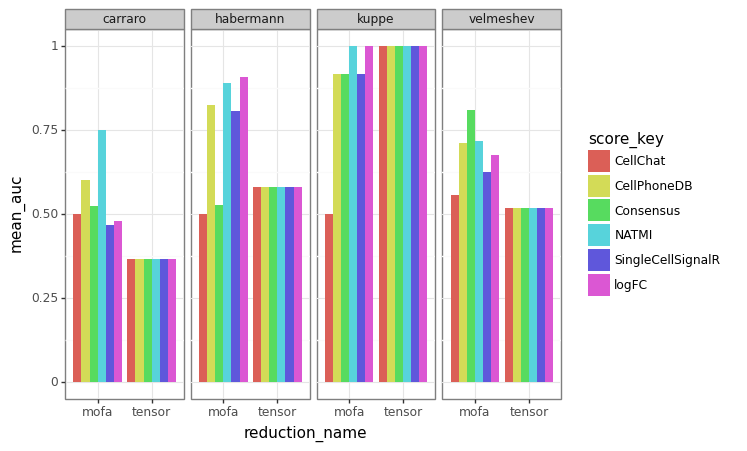

<ggplot: (8794587595662)>

In [27]:
## plot results as a bar chart
p9.ggplot(results, p9.aes(x='reduction_name', y='mean_auc', fill='score_key')) + \
    p9.geom_bar(stat='identity', position='dodge') + \
        p9.theme_bw() + p9.facet_grid(' ~ dataset')

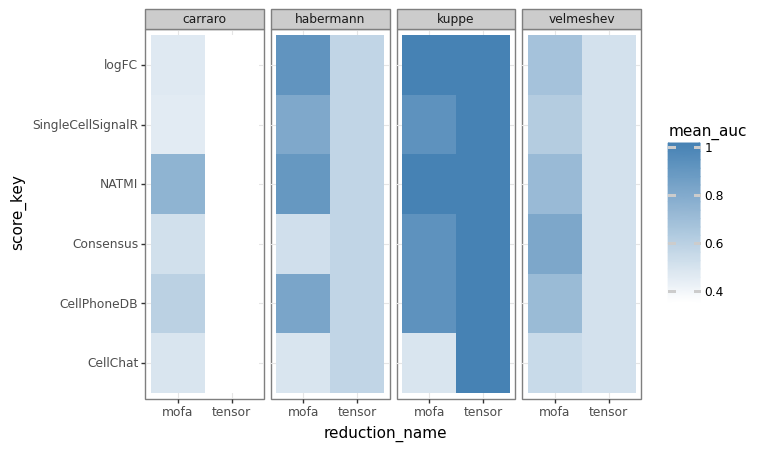

<ggplot: (8794587832939)>

In [24]:
## mosaic plot
p9.ggplot(results, p9.aes(x='reduction_name', y='score_key', fill='mean_auc')) + \
    p9.geom_tile() + \
        p9.theme_bw() + p9.facet_grid(' ~ dataset') + \
            p9.scale_fill_gradient(low='white', high='steelblue')